In [2]:
import pandas as pd
import msc_project.utils.plot_utils as pu
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
PATH_TEST23 = '/scratch/msc24h18/msc_project/results/test23/'
PATH_TEST31 = '/scratch/msc24h18/msc_project/results/test31/'
PATH_TEST32 = '/scratch/msc24h18/msc_project/results/test32/'
PATH_TEST42 = '/scratch/msc24h18/msc_project/results/test42/'

FIGURES_PATH = '/scratch/msc24h18/msc_project/results/report_figures/'

In [4]:
# class to simulate argparse argument object. will return None for any attribute that is not set
class Args:
    def __init__(self):
        self.aspect = 'auto'
        self.scale = 'linear'
    def __getattr__(self, name):
        return None

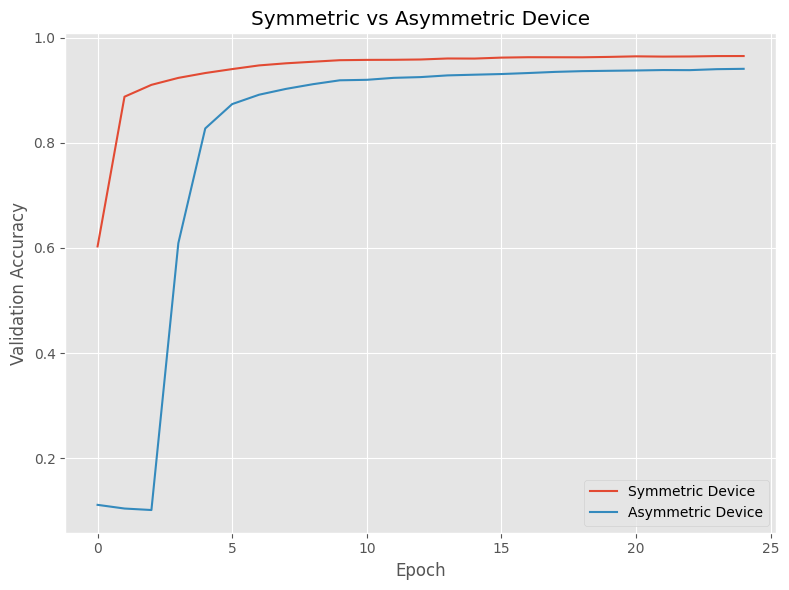

In [5]:
symmetric_data = pd.read_csv(PATH_TEST23 + 'aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(1)]20240919110516/metrics.csv')
asymmetric_data = pd.read_csv(PATH_TEST23 + 'aihwkit/pulsedAmplitudeSweep_DCIV[LBE247_ID294YR(3)]20240919111350/metrics.csv')


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(symmetric_data['epoch'], symmetric_data['val_acc'], label="Symmetric Device")
ax.plot(asymmetric_data['epoch'], asymmetric_data['val_acc'], label="Asymmetric Device")
ax.set(xlabel='Epoch', ylabel='Validation Accuracy', title='Symmetric vs Asymmetric Device')
ax.legend()
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'symmetric_vs_asymmetric_device.png')
plt.show()

/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:458: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  metadata = metadata.apply(pd.to_numeric, errors='ignore')
/scratch/msc24h18/msc_project/src/msc_project/utils/plot_utils.py:458: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  metadata = metadata.apply(pd.to_numeric, errors='ignore')


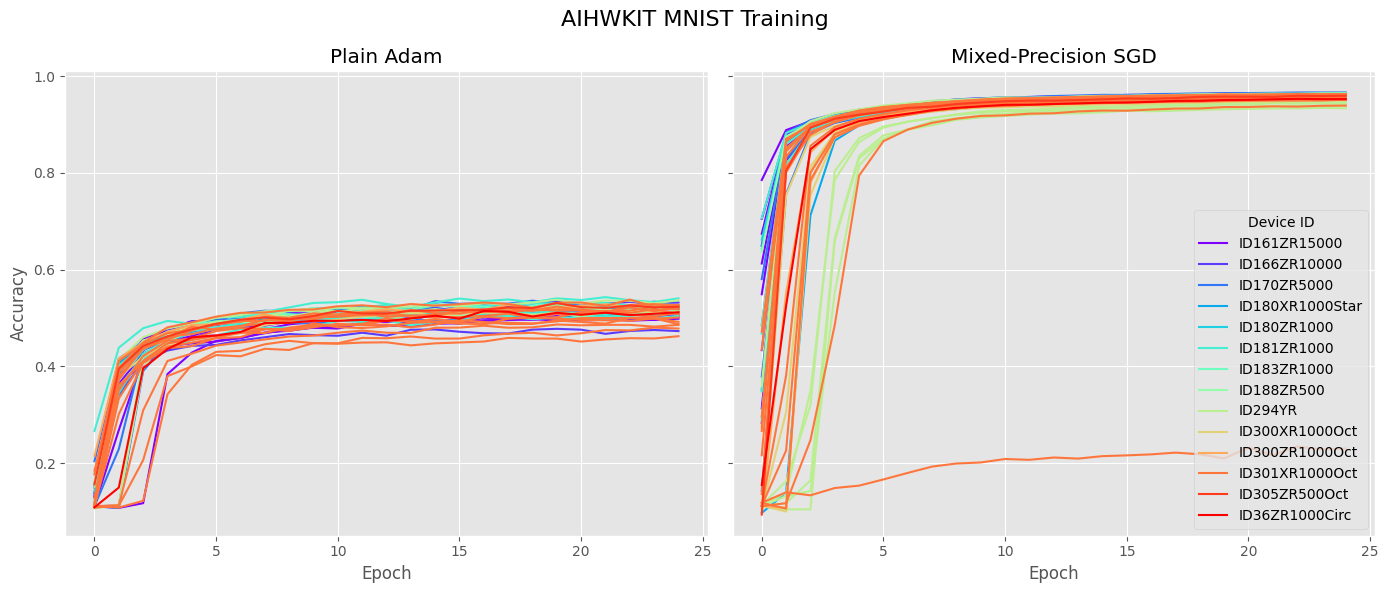

In [6]:
args = Args()
args.input = PATH_TEST42 + 'aihwkit'
args.x = 'epoch'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
pu._plot_pytorch(fig, axs[0], args)
args.input = PATH_TEST32 + 'no_out_scaling_wnstd_0/aihwkit'
pu._plot_pytorch(fig, axs[1], args)

axs[0].legend_ = None

axs[0].set(title = "Plain Adam", xlabel = "Epoch", ylabel = "Accuracy")
axs[1].set(title = "Mixed-Precision SGD", xlabel = "Epoch")
fig.suptitle("AIHWKIT MNIST Training", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_mnist_training.png')
plt.show()

Filtering data based on dw_min_std = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]


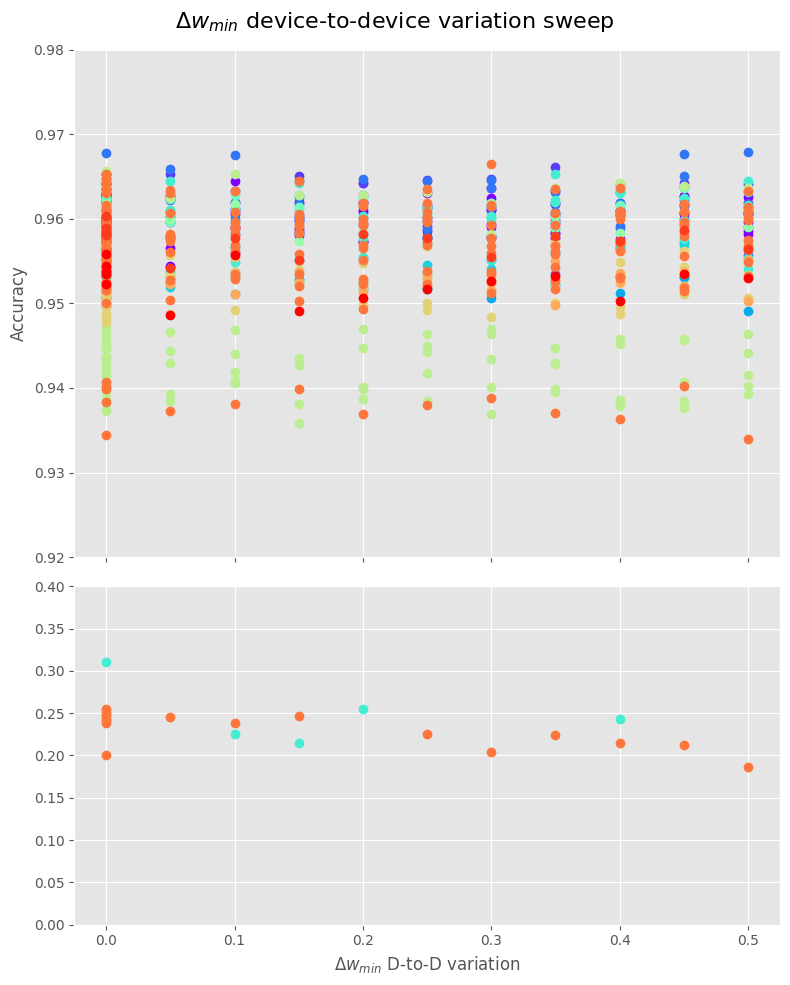

Filtering data based on dw_min_dtod = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_dtod = [0]
Filtering data based on write_noise_std = [0]
Filtering data based on w_min_dtod = [0]


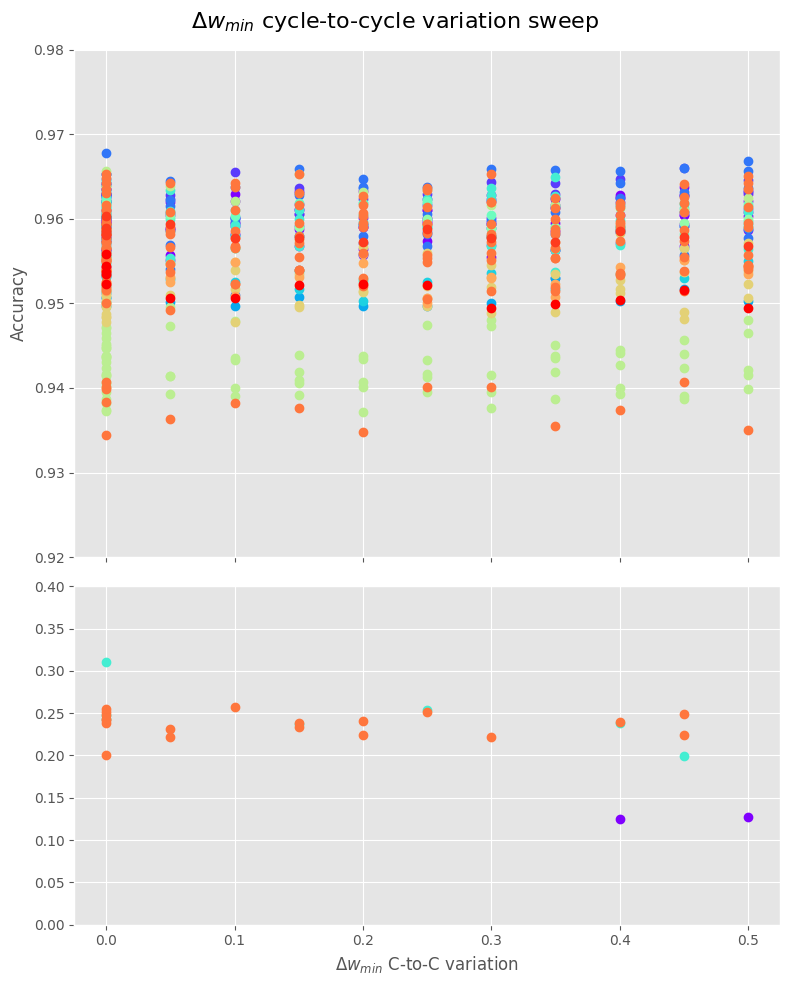

Filtering data based on dw_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on w_min_dtod = [0]
Filtering data based on dw_min_dtod = [0]
Filtering data based on dw_min_std = [0]
Filtering data based on w_min_dtod = [0]


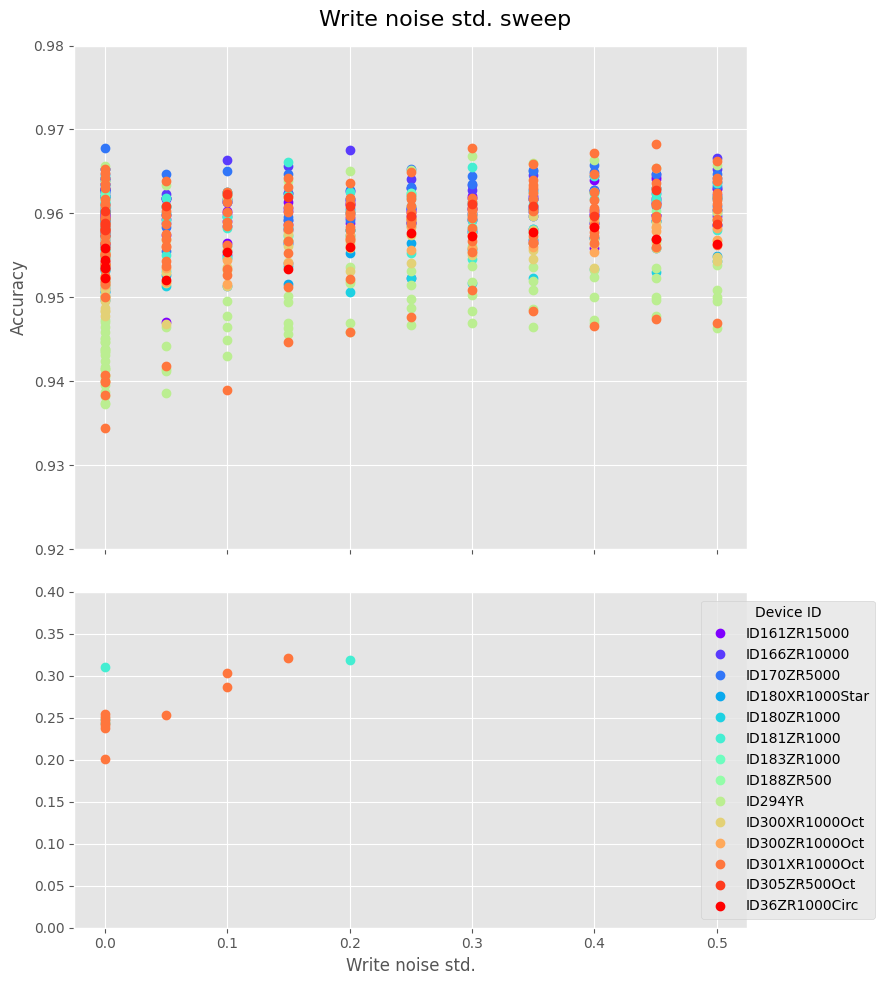

In [53]:
# dw_min_dtod #######################################################

args = Args()
args.input = PATH_TEST31 + 'all.csv'
args.x = 'dw_min_dtod'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_std", 0], ["write_noise_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [1.5, 1]}, sharex=True)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

axs[0].legend_ = None
axs[1].legend_ = None

axs[0].set(ylabel = "Accuracy", ylim = (0.92, 0.98))
axs[1].set(xlabel = "$\Delta w_{{min}}$ D-to-D variation", ylim = (0, 0.4))
fig.suptitle("$\Delta w_{{min}}$ device-to-device variation sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_dw_min_dtod_sweep.png')
plt.show()


# dw_min_std ##########################################################

args.input = PATH_TEST31 + 'all.csv'
args.x = 'dw_min_std'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_dtod", 0], ["write_noise_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [1.5, 1]}, sharex=True)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

axs[0].legend_ = None
axs[1].legend_ = None

axs[0].set(ylabel = "Accuracy", ylim = (0.92, 0.98))
axs[1].set(xlabel = "$\Delta w_{{min}}$ C-to-C variation", ylim = (0, 0.4))
fig.suptitle("$\Delta w_{{min}}$ cycle-to-cycle variation sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_dw_min_std_sweep.png')
plt.show()


# write_noise_std #######################################################

args.input = PATH_TEST31 + 'all.csv'
args.x = 'write_noise_std'
args.y = 'val_acc'
args.hue = 'device_id'
args.huescale = 'linear'
args.huelabel = "Device ID"
args.filter = [["dw_min_dtod", 0], ["dw_min_std", 0], ["w_min_dtod", 0]]

fig, axs = plt.subplots(2, 1, figsize=(9, 10), gridspec_kw={'height_ratios': [1.5, 1]}, sharex=True)

pu._plot_summary(fig, axs[0], args)
pu._plot_summary(fig, axs[1], args)

axs[0].legend_ = None
axs[1].legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title="Device ID")

axs[0].set(ylabel = "Accuracy", ylim = (0.92, 0.98))
axs[1].set(xlabel = "Write noise std.", ylim = (0, 0.4))
fig.suptitle("Write noise std. sweep", fontsize=16)
plt.tight_layout()
plt.savefig(FIGURES_PATH + 'aihwkit_write_noise_std_sweep.png')
plt.show()
